In [2]:
import requests
def connected_to_internet(url='http://www.google.com/', timeout=5):
    try:
        _ = requests.get(url, timeout=timeout)
        return True
    except requests.ConnectionError:
        print("No internet connection available.")
    return False

connected_to_internet()

True

In [3]:
#!pip install -r requirements.txt
#!pip install fxcmpy
#!pip install forexconnect
#!pip install sklearn
#!pip install statsmodels
#!pip install matplotlib
#!pip install ipywidgets

In [4]:
import os
import threading
import time
import importlib
import sys
import warnings
mpath = os.getcwd() + '/lib'
sys.path.append(mpath)

In [5]:
#from forexconnect import fxcorepy
import fxcmpyi
import pandas as pd
import matplotlib

import SharedObjects
import pairs
importlib.reload(SharedObjects)
importlib.reload(fxcmpyi)
importlib.reload(pairs)
#importlib.reload(sklearn)

import numpy as np

In [6]:
#fxcmpy.__version__

minutes: m1, m5, m15 and m30,
hours: H1, H2, H3, H4, H6 and H8,
one day: D1,
one week: W1,
one month: M1.

In [7]:
#Set variables
T = 'm1' #Period
sz = 1000; #Size
prs = dict()
pr_mlreg = dict()
mlr = pd.DataFrame()

Get access token from https://tradingstation.fxcm.com.

demo - for account type demo

real - for account type real

In [8]:
con = None
def custom():
    global con
    try:
        def login():
            global con
            TOKEN = '2720337434ea557dea25bad4cd9ad392d70f620d'
            con = fxcmpyi.fxcmpy(access_token=TOKEN, log_level='error', server='demo')
        threading.Thread(target=login).start()
    except:
        custom()
custom()
#con.close()

In [9]:
if con is not None:
    shd_obj = SharedObjects.SharedObjects(con)
    print(con.is_connected())

True


In [ ]:
#Function to update data
def price_update(data, dataframe):
    symbol = data['Symbol']
    if (len(prs) > 1):
        def misc():
            global pr_mlreg
            global mlr
            global sp_
            global shd_obj
            for symbol in prs:
                pr_mlreg[symbol] = prs.get(symbol).multiple_linear_regression(prs)
                mlr = shd_obj.mergeall_byrow(pr_mlreg)
                sp_ = prs.get(symbol).co_integration(prs)
                shd_obj.set_var(sp_[0], sp_[1], prs)
        threading.Thread(target=misc).start()

In [10]:
try:
    def get_past_prices():
        for symbol in shd_obj.tradable_pairs:
            dtf = shd_obj.historical_data(symbol, T, sz)
            if symbol not in prs:
                prs[symbol] = pairs.Pair(symbol, dtf)
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    #shd_obj.stream_data(symbol, (price_update, prs.get(symbol).on_price_update) )
    threading.Thread(target=get_past_prices).start()
except:
    print("Error: unable to start thread")

In [ ]:
#shd_obj.unstream_data()

In [ ]:
#con.close()

In [ ]:
#status = shd_obj.get_status()
#if(status == 'You are logged in'):
    #shd_obj.stream_data(T, sz, price_update)

In [ ]:
##Reverses the dataframe rows
#df[::-1]

#c = df.drop(columns=['tickvolume'])
#dates[0].minute
#dates[0].hour

#con.is_subscribed(instruments[0])
#con.get_subscribed_symbols()

#con.unsubscribe_market_data('EUR/USD')
#print(shd_obj.pairs)
#con.close()

In [ ]:
#con.get_default_account()
#con.get_prices('EUR/USD')

In [ ]:
#import inspect
#source_file_DF = inspect.getsource(pd.concat)
#print(source_file_DF)

In [13]:
def misc():
    global pr_mlreg
    global mlr
    global sp_
    global shd_obj
    for symbol in prs:
        pr_mlreg[symbol] = prs.get(symbol).multiple_linear_regression(prs)
        mlr = shd_obj.mergeall_byrow(pr_mlreg)
        sp_ = prs.get(symbol).co_integration(prs)
        shd_obj.set_var(sp_[0], sp_[1], prs)
threading.Thread(target=misc).start()

In [14]:
shd_obj.coint_mat

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,AUD/USD,USD/CAD,NZD/USD,EUR/GBP,USD/ZAR,ZAR/JPY
EUR/USD,0.999000,0.106414,0.087251,0.077763,0.001326,0.016402,0.001746,0.041418,8.796966e-02,7.533850e-02
USD/JPY,0.053820,0.984133,0.033963,0.071336,0.055398,0.045483,0.047934,0.032454,7.680151e-02,6.774968e-02
GBP/USD,0.445984,0.460501,0.915022,0.667875,0.521234,0.239476,0.586095,0.026155,3.232385e-01,5.282241e-01
USD/CHF,0.503685,0.657812,0.671085,0.999000,0.402894,0.584252,0.429992,0.587507,5.597666e-01,5.442882e-01
AUD/USD,0.013444,0.729781,0.627616,0.484389,0.941337,0.415188,0.027800,0.449121,6.840310e-01,6.917950e-01
USD/CAD,0.093548,0.484241,0.206361,0.535473,0.312028,0.999000,0.273106,0.098894,5.094895e-01,5.640770e-01
NZD/USD,0.002175,0.112225,0.114721,0.082145,0.003275,0.055229,0.999000,0.095897,1.160938e-01,1.140809e-01
EUR/GBP,0.487382,0.604699,0.044519,0.815127,0.543601,0.189649,0.705528,0.915617,6.228231e-01,6.823898e-01
USD/ZAR,0.203920,0.253614,0.118314,0.192539,0.225612,0.213195,0.214258,0.170625,9.297222e-01,5.569745e-07
ZAR/JPY,0.275717,0.391131,0.296551,0.312581,0.339093,0.338488,0.336926,0.291377,7.923890e-07,9.473180e-01


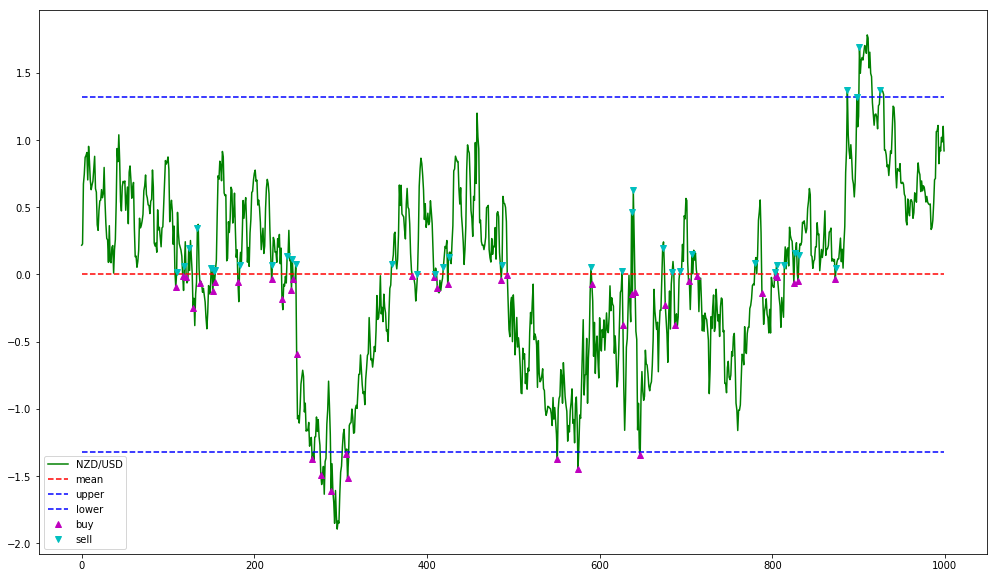

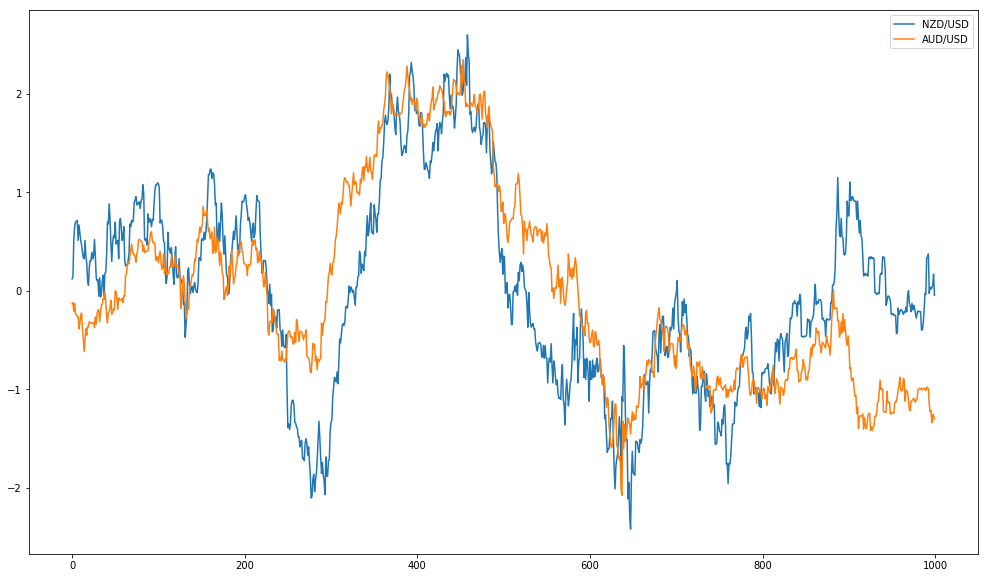

In [16]:
y = 'NZD/USD'
x = 'AUD/USD'
shd_obj.pairwise_spreadplot(y, x)
#shd_obj.pairwise_spread(y)
shd_obj.pairwise_plot(y, x)